## GTA ASSIGNMENT - UE20CS323
### Name : S M SUTHARSAN RAJ
### SRN  : PES1UG20CS362

#### TOPIC : `PROBLEM 11` : There are m vacant positions and m applicants for these vacant positions. Salary expectations and proficiency in executing a job of every applicant is taken as input. It is not mandatory that every applicant is suitable for available vacant posts. Model the problem and apply Hungarian method to find the optimal assignment.

### Hungarian Method for Job assignment

In [1]:
import numpy as np
import copy

# Just as a refernce matrix
max_int = 100
n = 5
cost_matrix = np.random.randint(max_int, size = (n,n))

print(cost_matrix)

[[67 63 70  9 36]
 [91  4 59 98 26]
 [16 16 28 46 50]
 [21  6 96 68 10]
 [91 61 89 30  1]]


#### Taking input for `salary` and `proficiency` for each job for each matrix

In [2]:
import numpy as np
import copy

# m applicants for m vacant positions.
m = int(input("Enter the number of vacant positions which is same as number of applicants: "))
salary = np.zeros((m, m))
proficiency = np.zeros((m, m))

# for i in range(0,m):
#     salary.append([])
#     proficiency.append([])
#     for j in range(0,n):
#         salary[i].append(0)
#         proficiency[i].append(0)

for i in range(0,m):
  for j in range(0,m):
    print("Enter the expected salary of the employee {} for job {} :".format(i+1,j+1))
    salary[i][j] = int(input())
    
for i in range(0,m):
  for j in range(0,m):
    print("Enter the proficiency of the employee {} in executing job {} :".format(i+1,j+1))
    proficiency[i][j] = int(input())

cost_matrix = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        cost_matrix[i][j] = proficiency[i][j] / salary[i][j] # Taking this for giving proficiency a bigger hand.

Enter the number of vacant positions which is same as number of applicants: 3
Enter the expected salary of the employee 1 for job 1 :
300
Enter the expected salary of the employee 1 for job 2 :
100
Enter the expected salary of the employee 1 for job 3 :
150
Enter the expected salary of the employee 2 for job 1 :
200
Enter the expected salary of the employee 2 for job 2 :
350
Enter the expected salary of the employee 2 for job 3 :
250
Enter the expected salary of the employee 3 for job 1 :
400
Enter the expected salary of the employee 3 for job 2 :
200
Enter the expected salary of the employee 3 for job 3 :
100
Enter the proficiency of the employee 1 in executing job 1 :
10
Enter the proficiency of the employee 1 in executing job 2 :
6
Enter the proficiency of the employee 1 in executing job 3 :
4
Enter the proficiency of the employee 2 in executing job 1 :
5
Enter the proficiency of the employee 2 in executing job 2 :
8
Enter the proficiency of the employee 2 in executing job 3 :
2
Ent

##### Displaying the matrices

In [3]:
# Salary Expectitation Matrix (S)
print('The Salary Expectation Matrix is:\n')
print(salary)
print('\nThe Proficiency Matrix is:\n')
print(proficiency)
print('\nThe Cost Matrix is:\n')
print(cost_matrix)

The Salary Expectation Matrix is:

[[300. 100. 150.]
 [200. 350. 250.]
 [400. 200. 100.]]

The Proficiency Matrix is:

[[10.  6.  4.]
 [ 5.  8.  2.]
 [ 4.  9.  7.]]

The Cost Matrix is:

[[0.03333333 0.06       0.02666667]
 [0.025      0.02285714 0.008     ]
 [0.01       0.045      0.07      ]]


#### Initial hungarian step for taking difference between all the elements and the minimum number

In [4]:
def hungarian_step(mat): 
    #The for-loop iterates through every column in the matrix so we subtract this value to every element of the row
    for row_num in range(mat.shape[0]): 
        mat[row_num] = mat[row_num] - np.min(mat[row_num])

    #We repeat the process for the columns
    for col_num in range(mat.shape[1]): 
        mat[:,col_num] = mat[:,col_num] - np.min(mat[:,col_num])
    
    return mat

In [5]:
def min_zeros(zero_mat, mark_zero):
    # min_row = [number of zeros, row index number]
    min_row = [99999, -1]

    for row_num in range(zero_mat.shape[0]): 
        if np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True):
            min_row = [np.sum(zero_mat[row_num] == True), row_num]

    # Marked the specific row and column as False
    zero_index = np.where(zero_mat[min_row[1]] == True)[0][0]
    mark_zero.append((min_row[1], zero_index))
    zero_mat[min_row[1], :] = False
    zero_mat[:, zero_index] = False

##### After extracting the zeros in the matrix, we can mark the rows and columns to determine whether the hungarian algorithm is complete.

In [6]:
def mark_matrix(mat):
    # Transform the matrix to boolean matrix(0 = True, others = False)
    cur_mat = mat
    zero_bool_mat = (cur_mat == 0)
    zero_bool_mat_copy = zero_bool_mat.copy()

    # Recording possible answer positions by marked_zero
    marked_zero = []
    while (True in zero_bool_mat_copy):
        min_zeros(zero_bool_mat_copy, marked_zero)

    # Recording the row and column indexes seperately.
    marked_zero_row = []
    marked_zero_col = []
    for i in range(len(marked_zero)):
        marked_zero_row.append(marked_zero[i][0])
        marked_zero_col.append(marked_zero[i][1])
    
    # Mark rows not containing zeros
    non_marked_row = list(set(range(cur_mat.shape[0])) - set(marked_zero_row))
    
    # Mark columns with zeros
    marked_cols = []
    check_switch = True
    while check_switch:
        check_switch = False
        for i in range(len(non_marked_row)):
            row_array = zero_bool_mat[non_marked_row[i], :]
            for j in range(row_array.shape[0]):
                if row_array[j] == True and j not in marked_cols:

                    marked_cols.append(j)
                    check_switch = True

        for row_num, col_num in marked_zero:
            if row_num not in non_marked_row and col_num in marked_cols:
                
                non_marked_row.append(row_num)
                check_switch = True
    
    # mark rows with zeros
    marked_rows = list(set(range(mat.shape[0])) - set(non_marked_row))
    
    return(marked_zero, marked_rows, marked_cols)

##### In the case where marked rows and columns do not add up to  n , we need to adjust the matrix to continue the search.

In [7]:
def adjust_matrix(mat, cover_rows, cover_cols):
    cur_mat = mat
    non_zero_element = []
    
    # Find the minimum value of an element not in a marked column/row 
    for row in range(len(cur_mat)):
        if row not in cover_rows:
            for i in range(len(cur_mat[row])):
                if i not in cover_cols:
                    non_zero_element.append(cur_mat[row][i])
    
    min_num = min(non_zero_element)

    # Subtract to all values not in a marked row/column
    for row in range(len(cur_mat)):
        if row not in cover_rows:
            for i in range(len(cur_mat[row])):
                if i not in cover_cols:
                    cur_mat[row, i] = cur_mat[row, i] - min_num
    # Add to all values in marked rows/column
    for row in range(len(cover_rows)):  
        for col in range(len(cover_cols)):
            cur_mat[cover_rows[row], cover_cols[col]] = cur_mat[cover_rows[row], cover_cols[col]] + min_num

    return cur_mat

#### The final Hungarian algorithm which combines all the above methods

In [8]:
def hungarian_algorithm(cost_matrix):
    n = cost_matrix.shape[0]
    cur_mat = copy.deepcopy(cost_matrix) # Copying of the original cost matrix to retain it
    
    cur_mat = hungarian_step(cur_mat)
    
    count_zero_lines = 0
        
    while count_zero_lines < n:
        ans_pos, marked_rows, marked_cols = mark_matrix(cur_mat)
        count_zero_lines = len(marked_rows) + len(marked_cols)

        if count_zero_lines < n:
            cur_mat = adjust_matrix(cur_mat, marked_rows, marked_cols)
    
        return ans_pos

In [9]:
assignment = hungarian_algorithm(cost_matrix)
print(f"The final assignment is: {assignment}")
print(cost_matrix)

The final assignment is: [(0, 2), (1, 1), (2, 0)]
[[0.03333333 0.06       0.02666667]
 [0.025      0.02285714 0.008     ]
 [0.01       0.045      0.07      ]]


In [10]:
# The total cost of the assignment

total = 0
for i in range(len(assignment)):
    total += cost_matrix[assignment[i][0], assignment[i][1]]
print(f"The total cost of the assignment is {total}")

The total cost of the assignment is 0.05952380952380953


#### Plotting the assignment obtained with the help of graph

The final assignment is (0, 2), (1, 1), (2, 0)
The total cost of the assignment is 0.05952380952380953.


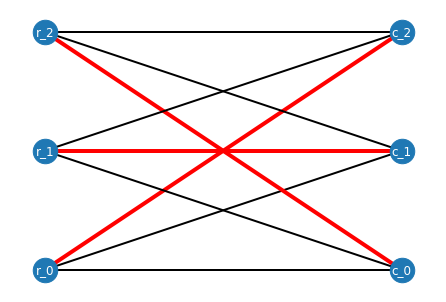

In [11]:
# Networkx used for plotting the graph

from scipy.optimize import linear_sum_assignment
def draw_network(cost_matrix, assignment):
    import networkx as nx
    
    x_diff = 10
    
    y_min = 0
    y_max = 5
    
    G = nx.Graph()
    
    for i in range(len(assignment)):
        G.add_node(f"r_{i}", pos = (y_min, i*x_diff))
        G.add_node(f"c_{i}", pos = (y_max, i*x_diff))
    
    pos=nx.get_node_attributes(G,'pos')
    
    for i in range(len(assignment)):
        for j in range(len(assignment)):
            val = [i, j]
            if val in assignment:
                c = 'r'
                w = 4
            else:
                c = 'k'
                w = 2
            G.add_edge(f"r_{i}", f"c_{j}", color=c, weight=w)
            
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    nx.draw(G,pos,with_labels = True, node_size = 600, font_color = 'w', edge_color = colors, width = weights)
    

def calc_costs(cost_matrix, assignment):
    total = 0
    for a in assignment:
        total += cost_matrix[a[0], a[1]]
    return total

def clean_assignment(row, columns):
    assignments = []

    text = "The final assignment is "
    for i in range(len(row)):
        assignments.append([row[i], columns[i]])
        if i > 0:
            text += ", "
        text += f"({row[i]}, {columns[i]})"
    print(text)
    return assignments

    
def run_assignment(cost_matrix):
    row,columns = linear_sum_assignment(cost_matrix)
    assignments = clean_assignment(row, columns)
    total_cost = calc_costs(cost_matrix, assignments)
    print(f"The total cost of the assignment is {total_cost}.")
    draw_network(cost_matrix, assignments)

run_assignment(cost_matrix)    